# Customer Segmentation and Profiling:

                  Date  Order # N. Revenue (formatted)      Status  \
0  2023-10-26 14:50:17  16698.0                RM57.80  processing   
1  2023-10-26 13:53:47  16697.0                RM32.90  processing   
2  2023-10-26 13:04:17  16696.0                RM32.90  processing   
3  2023-10-26 13:00:49  16695.0                RM82.70  processing   
4  2023-10-26 12:47:36  16694.0                RM32.90  processing   

                               Customer Customer type  \
0  AINAA SYAFIQAH ABD RAHMAN ABD RAHMAN           new   
1                              Ja Hasim           new   
2                             nasy anis           new   
3   Herny erdawati binti Mohamad Rashed           new   
4                      Suhaina Sulaiman           new   

                                          Product(s)  Items sold  N. Revenue  \
0  1× LIP BOOSTER - WATERMELON, 1× LIP BOOSTER - ...         2.0        49.8   
1                             1× LIP BOOSTER - MELON         1.0        24.9

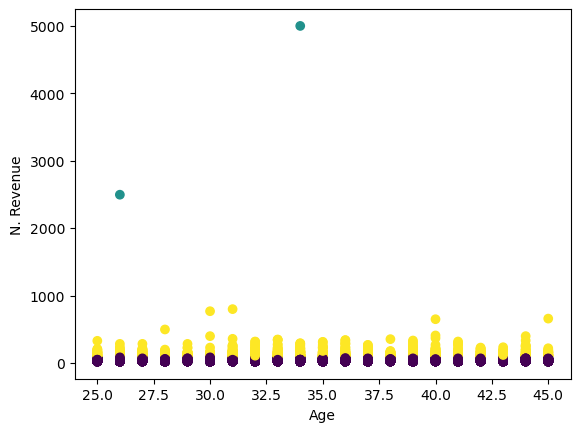

   Items sold  N. Revenue  Age  Cluster
0          10          50   25        0
1          20         100   35        2


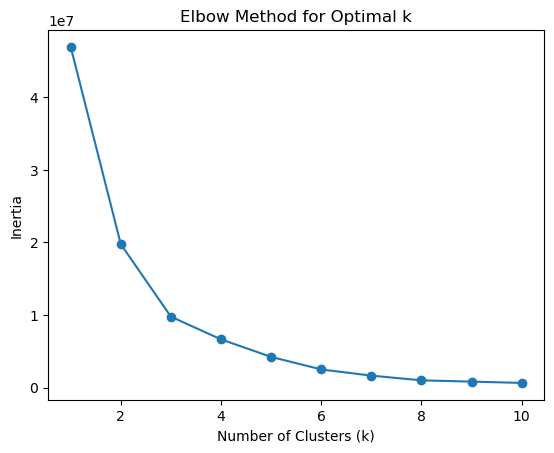

              Order #  Items sold   N. Revenue        Age      Age.1
Cluster                                                             
0        10657.758727    1.617911    43.568272  34.618795  34.618795
1        11761.000000   94.000000  3745.600000  30.000000  30.000000
2        11024.793132    3.965658   141.744154  34.869174  34.869174


In [36]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load Order Report Dataset
order_df = pd.read_csv('datasets/OrderReports.csv')

# Feature selection
features = order_df[['Items sold', 'N. Revenue', 'Age']]

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You may adjust the number of clusters
order_df['Cluster'] = kmeans.fit_predict(features) 
print(order_df.head())


from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(features, order_df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Visualize
plt.scatter(order_df['Age'], order_df['N. Revenue'], c=order_df['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('N. Revenue')
plt.show()


# Assuming you want to predict the cluster for new data
new_data = pd.DataFrame({'Items sold': [10, 20], 'N. Revenue': [50, 100], 'Age': [25, 35]})

# Predict clusters for new data
new_data['Cluster'] = kmeans.predict(new_data[['Items sold', 'N. Revenue', 'Age']])
print(new_data)

# Elbow Method to find optimal k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# print the cluster from the dataframe
cluster_means = order_df.groupby('Cluster').mean()
print(cluster_means)












# Identifying Best Selling Products:

In [37]:
# Load Order Report and Product List Datasets
product_df = pd.read_csv('datasets/ProductList.csv')

# use collab filtering to identify best selling products
from numpy import product
from surprise import Reader, Dataset, SVD

# Load the dataset
reader = Reader()
# use the 3 columns from the dataset
product_data = Dataset.load_from_df(product_df[['SKU','Items sold', 'N. Revenue' ]], reader)

# Use the SVD algorithm.
svd = SVD()








Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    13746.06573944.64002834.418213607.25891774.51277181.37915347.7808
MAE (testset)     4287.71301804.56361775.92273762.7545741.65912474.52261333.1844
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
user: 1          item: 1          r_ui = None   est = 5.00   {'was_impossible': False}
